## Project Title : Cyber Crime Analysis

## Project Objective : 
####                                          To know how the  cyber crime analysis in different states and territories. User can accordingly manipulate how in each state or territory the cyber crime happens.I build a model and done the analysis of cyber crime with available independent variables.  Further, the model will be a good way for user to understand the cyber crime analysis of a new state or area.


## Steps and Tasks :

### Step 1 : Reading and understanding of data

### Step 2 : Data cleaning and Preparation

### Step 3 : Visualizing the data

### Step 4 : Deriving new features

### Step 5 : Train-Test Split and feature scaling

### Step 6 : Model Building

### Step 7 : Accuracy and Evaluation

### Step 1 : Reading and understanding of data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime_data = pd.read_csv('cyber_crime.csv')


In [3]:
crime_data.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
0,1,State,Andhra Pradesh,616,931,1207,4.4,520.3,2.3
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5
2,3,State,Assam,696,1120,2022,7.4,340.4,5.9
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3
4,5,State,Chhattisgarh,90,171,139,0.5,284.7,0.5


In [4]:
crime_data.tail()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
34,34,Union Territory,Delhi UT,98,162,189,0.7,195.6,1.0
35,35,Union Territory,Lakshadweep,0,0,4,0.0,0.7,6.0
36,36,Union Territory,Puducherry,2,5,14,0.1,14.8,0.9
37,Union Territory,Union Territory,Total UT(s),130,203,244,0.9,236.0,1.0
38,Total (All India),Total (All India),Total (All India),12317,21796,27248,100.0,13233.8,2.1


In [5]:
crime_data.shape

(39, 9)

In [6]:
crime_data.columns

Index(['S. No', 'Category', 'State/UT', '2016', '2017', '2018',
       'Percentage Share of State/UT (2018)',
       'Mid-Year Projected Population (in Lakhs) (2018)+',
       'Rate of Total Cyber Crimes (2018)++'],
      dtype='object')

In [7]:
crime_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   S. No                                             39 non-null     object 
 1   Category                                          39 non-null     object 
 2   State/UT                                          39 non-null     object 
 3   2016                                              39 non-null     int64  
 4   2017                                              39 non-null     int64  
 5   2018                                              39 non-null     int64  
 6   Percentage Share of State/UT (2018)               39 non-null     float64
 7   Mid-Year Projected Population (in Lakhs) (2018)+  39 non-null     float64
 8   Rate of Total Cyber Crimes (2018)++               39 non-null     float64
dtypes: float64(3), int64(3),

In [8]:
crime_data.describe()

,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,947.461538,1676.615385,2096.000000,7.689744,1017.987179,1.689744
std,2724.974532,4832.658115,6065.161416,22.257391,2885.991893,1.811193
min,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000
25%,9.500000,11.500000,24.500000,0.100000,18.300000,0.500000
50%,102.000000,176.000000,239.000000,0.900000,284.000000,1.000000
75%,439.500000,772.000000,886.500000,3.250000,663.850000,2.200000
max,12317.000000,21796.000000,27248.000000,100.000000,13233.800000,8.900000


### Step 2 : Data cleaning and Preparation


In [9]:
crime_data.isnull().sum()

S. No                                               0
Category                                            0
State/UT                                            0
2016                                                0
2017                                                0
2018                                                0
Percentage Share of State/UT (2018)                 0
Mid-Year Projected Population (in Lakhs) (2018)+    0
Rate of Total Cyber Crimes (2018)++                 0
dtype: int64

In [10]:
crime_data['Category'].unique()

array(['State', 'Union Territory', 'Total (All India)'], dtype=object)

In [11]:
crime_data['Category'].value_counts()

State                30
Union Territory       8
Total (All India)     1
Name: Category, dtype: int64

### Step 3 : Visualizing the data

In [12]:
crime_data.corr()

,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
2016,1.00000,0.998590,0.993830,0.993860,0.992970,0.136820
2017,0.99859,1.000000,0.998014,0.998030,0.991394,0.164416
2018,0.99383,0.998014,1.000000,0.999999,0.986735,0.200750
Percentage Share of State/UT (2018),0.99386,0.998030,0.999999,1.000000,0.986789,0.200419
Mid-Year Projected Population (in Lakhs) (2018)+,0.99297,0.991394,0.986735,0.986789,1.000000,0.077051
Rate of Total Cyber Crimes (2018)++,0.13682,0.164416,0.200750,0.200419,0.077051,1.000000


In [13]:
crime_data.corr().style.background_gradient(cmap = 'coolwarm')

,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
2016,1.000000,0.998590,0.993830,0.993860,0.992970,0.136820
2017,0.998590,1.000000,0.998014,0.998030,0.991394,0.164416
2018,0.993830,0.998014,1.000000,0.999999,0.986735,0.200750
Percentage Share of State/UT (2018),0.993860,0.998030,0.999999,1.000000,0.986789,0.200419
Mid-Year Projected Population (in Lakhs) (2018)+,0.992970,0.991394,0.986735,0.986789,1.000000,0.077051
Rate of Total Cyber Crimes (2018)++,0.136820,0.164416,0.200750,0.200419,0.077051,1.000000


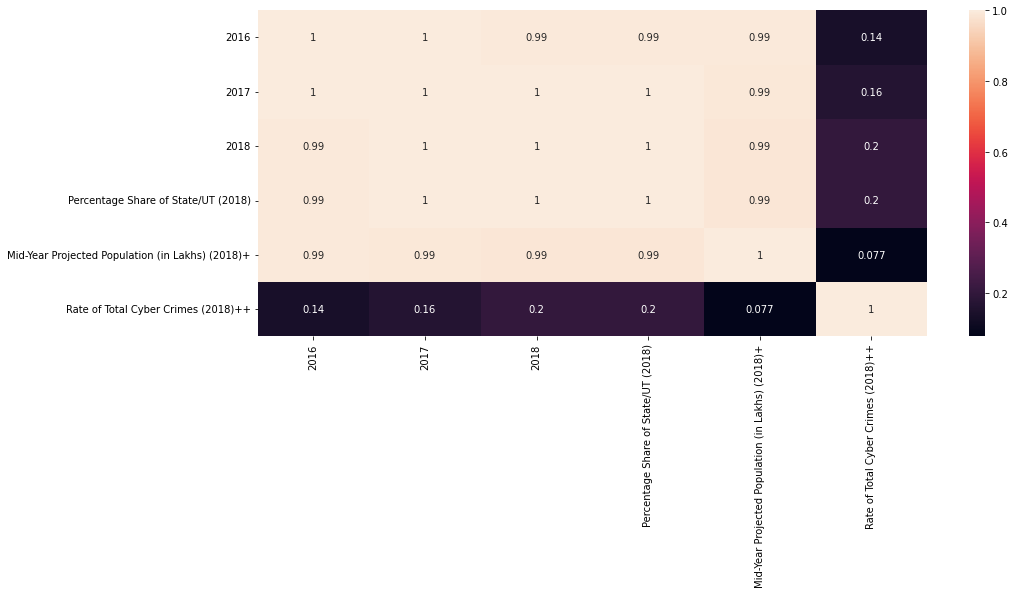

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(crime_data.corr(),annot=True)
plt.show()


In [15]:
crime_data = crime_data.drop(labels=[29], axis=0)

In [16]:
crime_data = crime_data.drop(labels=[33, 34], axis=0)

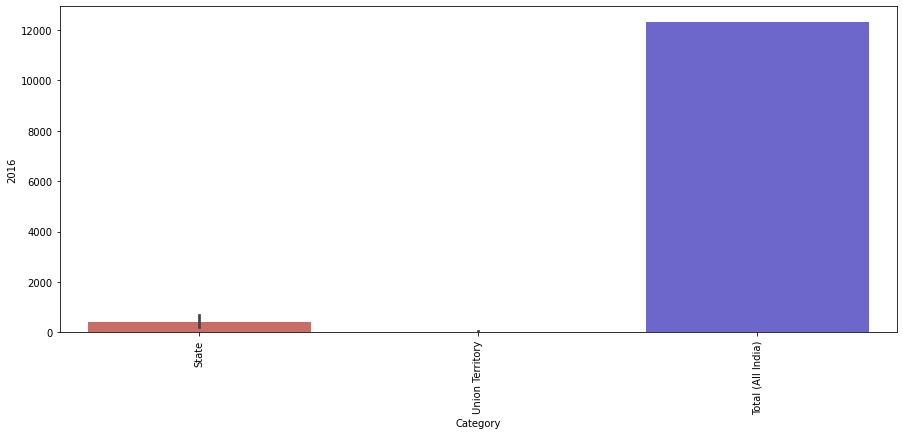

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Category', y = '2016', data = crime_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()


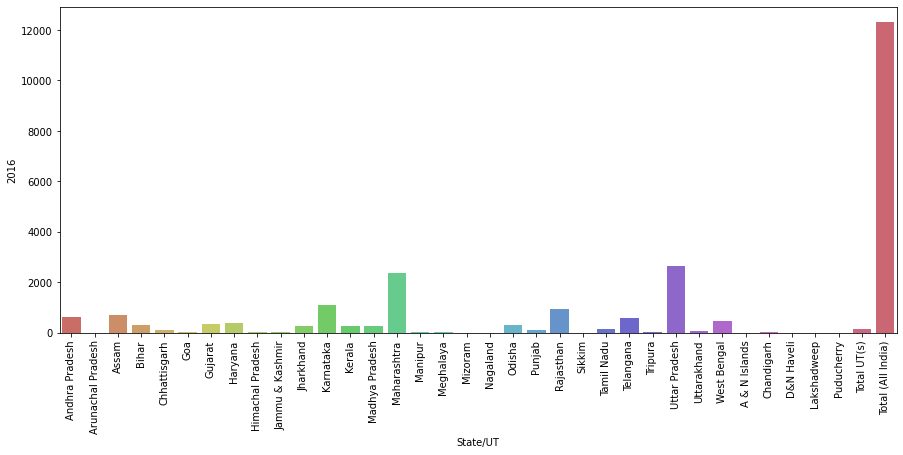

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'State/UT', y = '2016', data = crime_data,palette='hls')
plt.xticks(rotation = 90)
plt.show()

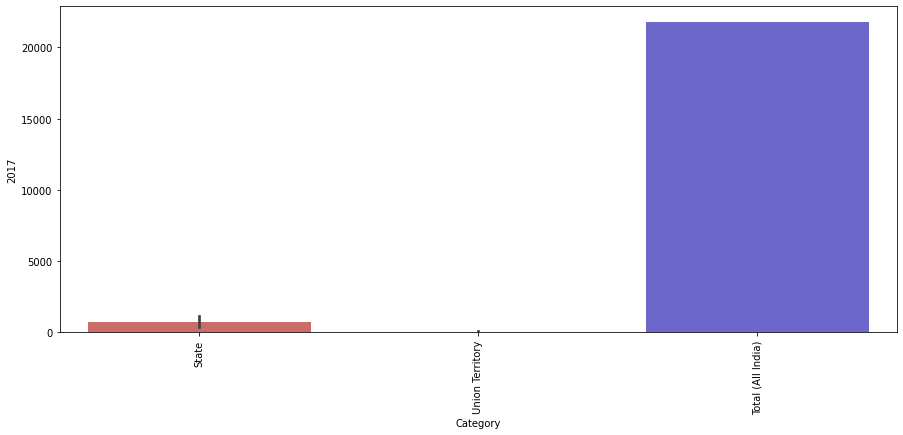

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Category', y = '2017', data = crime_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

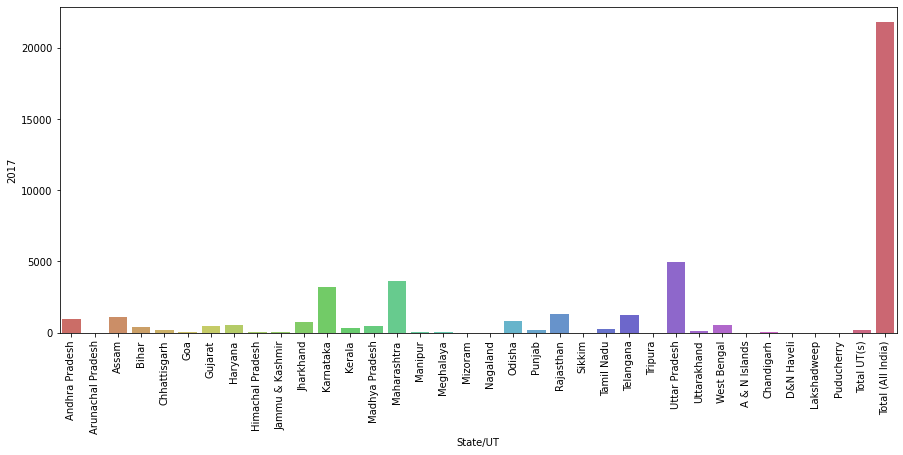

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'State/UT', y = '2017', data = crime_data,palette='hls')
plt.xticks(rotation = 90)
plt.show()

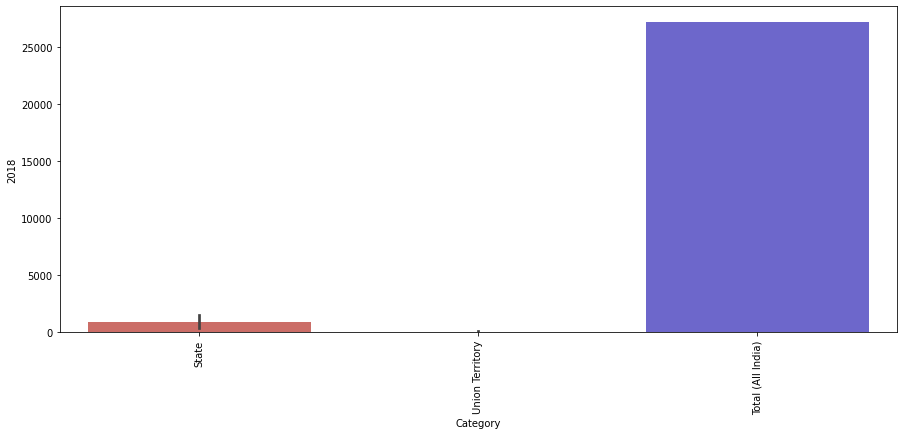

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Category', y = '2018', data = crime_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

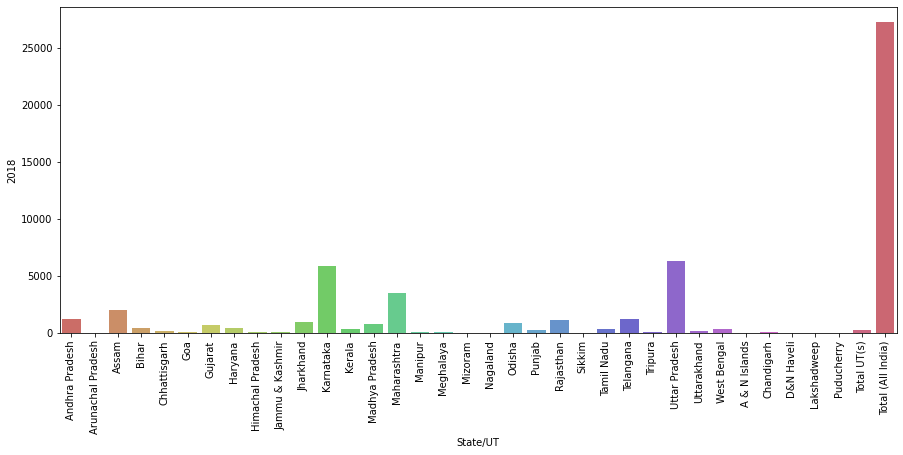

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'State/UT', y = '2018', data = crime_data,palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [23]:
crime_data.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
0,1,State,Andhra Pradesh,616,931,1207,4.4,520.3,2.3
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5
2,3,State,Assam,696,1120,2022,7.4,340.4,5.9
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3
4,5,State,Chhattisgarh,90,171,139,0.5,284.7,0.5


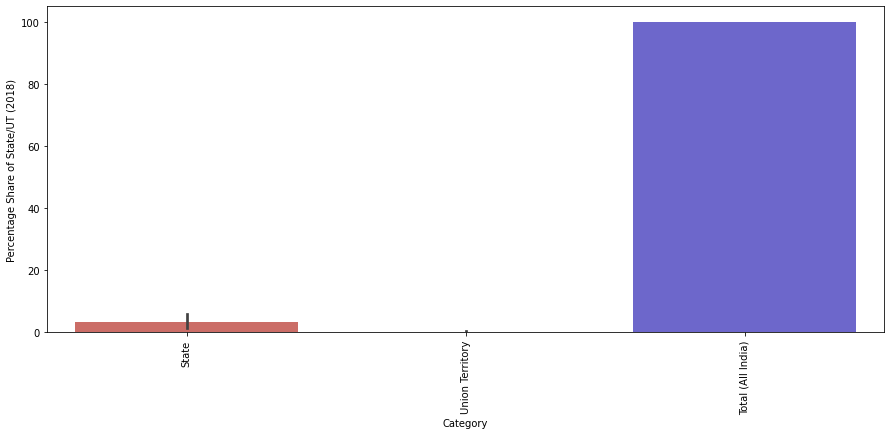

In [24]:
#percentage share for 2018
plt.figure(figsize=(15,6))
sns.barplot(x = 'Category', y = 'Percentage Share of State/UT (2018)', data = crime_data,
palette='hls')
plt.xticks(rotation = 90)
plt.show()

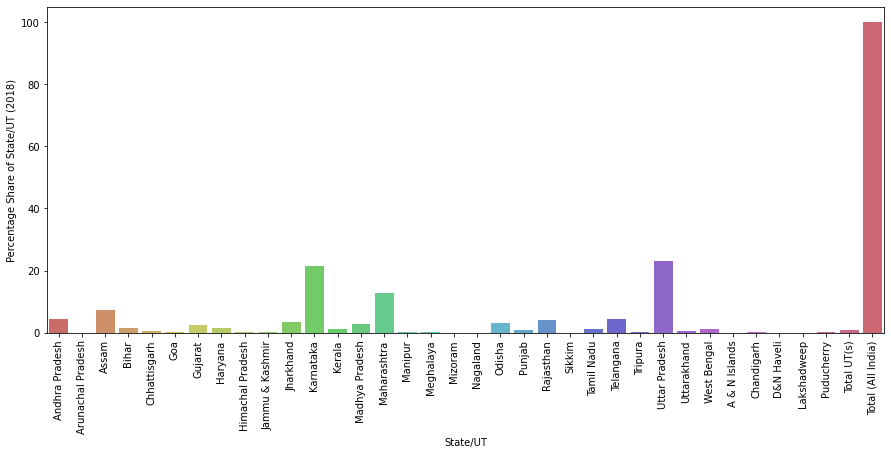

In [25]:
# percentage share for 2018
plt.figure(figsize=(15,6))
sns.barplot(x = 'State/UT', y = 'Percentage Share of State/UT (2018)', data = crime_data,
palette='hls')
plt.xticks(rotation = 90)
plt.show()

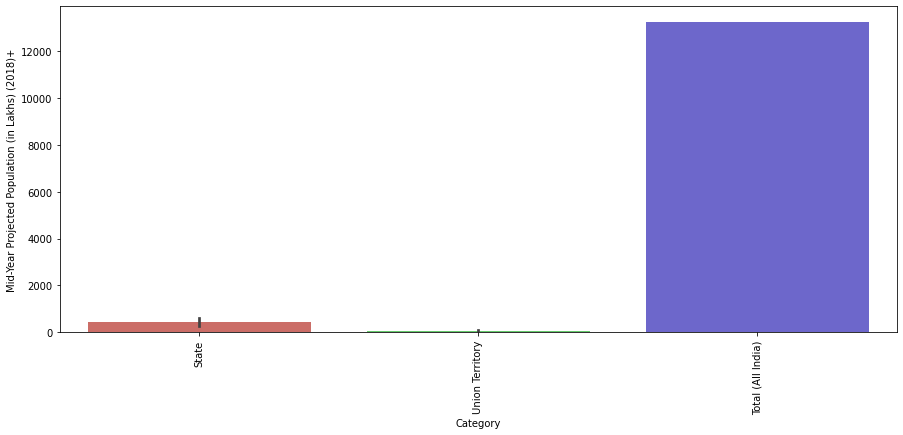

In [26]:
#projected population for 2018
plt.figure(figsize=(15,6))
sns.barplot(x = 'Category', y = 'Mid-Year Projected Population (in Lakhs) (2018)+', data = crime_data,
palette='hls')
plt.xticks(rotation = 90)
plt.show()


(array([0, 1, 2]),
 [Text(0, 0, 'State'),
  Text(1, 0, 'Union Territory'),
  Text(2, 0, 'Total (All India)')])

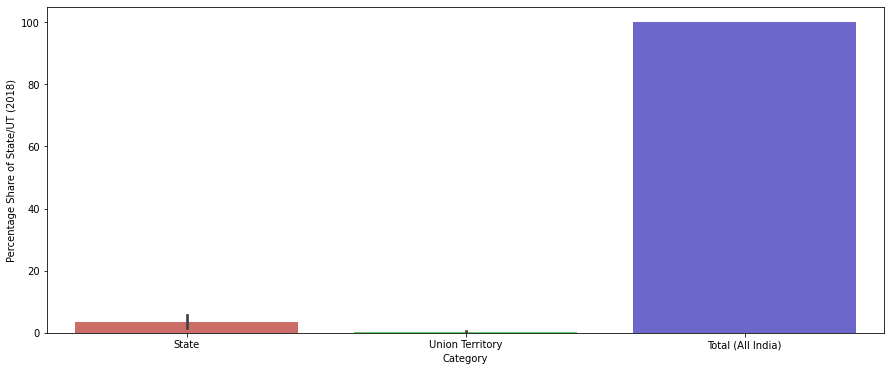

In [27]:
#percentage share for 2018
plt.figure(figsize=(15,6))
sns.barplot(x = 'Category', y = 'Percentage Share of State/UT (2018)', data = crime_data,
palette='hls')
plt.xticks()

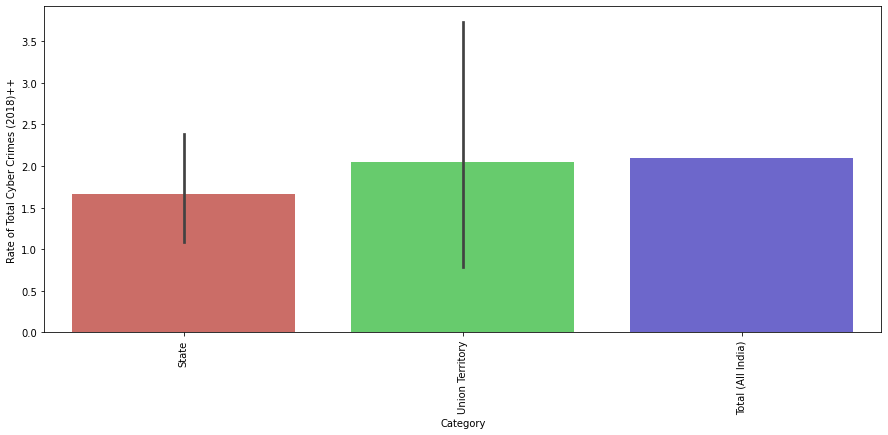

In [28]:
#rate cyber crime for 2018
plt.figure(figsize=(15,6))
sns.barplot(x = 'Category', y = 'Rate of Total Cyber Crimes (2018)++', data = crime_data,
palette='hls')
plt.xticks(rotation = 90)
plt.show()

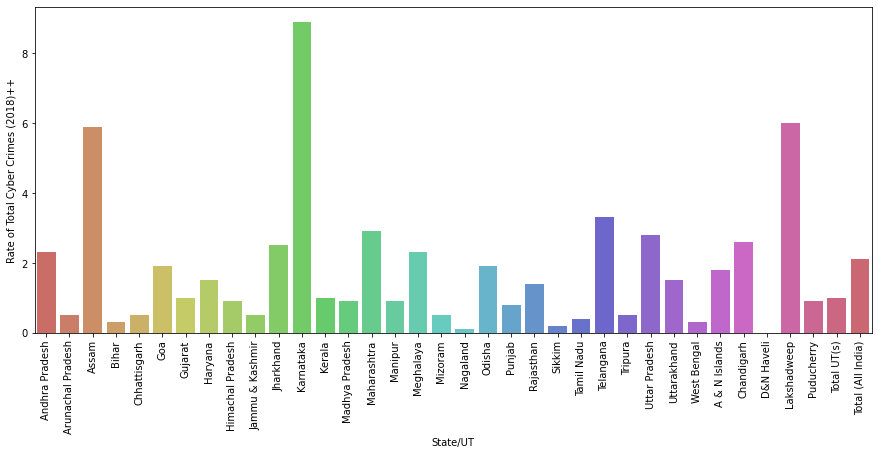

In [29]:
#rate cyber crime for 2018
plt.figure(figsize=(15,6))
sns.barplot(x = 'State/UT', y = 'Rate of Total Cyber Crimes (2018)++', data = crime_data,
palette='hls')
plt.xticks(rotation = 90)
plt.show()


### Step 4 : Deriving new features

In [30]:
crime_data['Total'] = crime_data['2016'] + crime_data['2017'] + crime_data['2018']


In [31]:
crime_data_new = crime_data[['2016', '2017', '2018']]


In [32]:
crime_data_new.head()

,2016,2017,2018
0,616,931,1207
1,4,1,7
2,696,1120,2022
3,309,433,374
4,90,171,139


In [33]:
crime_data_new = crime_data_new.transpose()


In [34]:
crime_data_new.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,30,31,32,35,36,37,38
2016,616,4,696,309,90,31,362,401,31,28,...,2639,62,478,3,26,1,0,2,130,12317
2017,931,1,1120,433,171,13,458,504,56,63,...,4971,124,568,3,32,1,0,5,203,21796
2018,1207,7,2022,374,139,29,702,418,69,73,...,6280,171,335,7,30,0,4,14,244,27248


In [35]:
crime_data_new = crime_data_new.reset_index()

In [36]:
crime_data_new = crime_data_new.rename(columns = {'index':'year'})


In [37]:
crime_data_new.columns

Index(['year',      0,      1,      2,      3,      4,      5,      6,      7,
            8,      9,     10,     11,     12,     13,     14,     15,     16,
           17,     18,     19,     20,     21,     22,     23,     24,     25,
           26,     27,     28,     30,     31,     32,     35,     36,     37,
           38],
      dtype='object')

In [38]:
cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
10, 11, 12, 13, 14, 15, 16, 17, 18,
19, 20, 21, 22, 23, 24, 25,
26, 27, 28, 30, 31, 32]


In [39]:
crime_data_new['total'] = crime_data_new[cols].sum(axis=1)

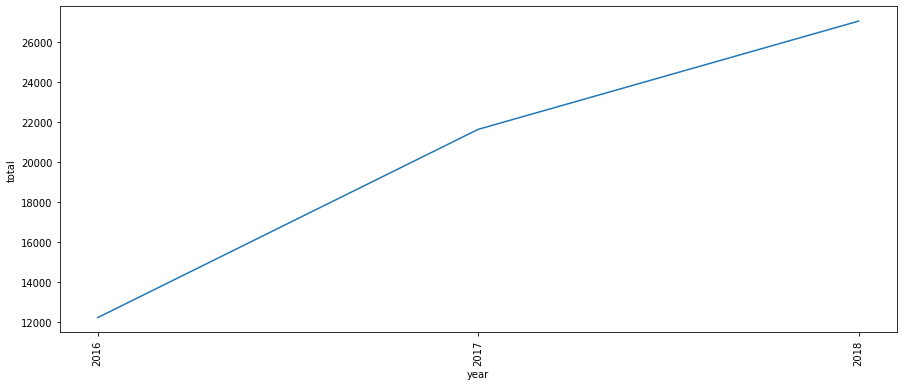

In [40]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'year', y = 'total', data = crime_data_new,
palette='hls')
plt.xticks(rotation = 90)
plt.show()

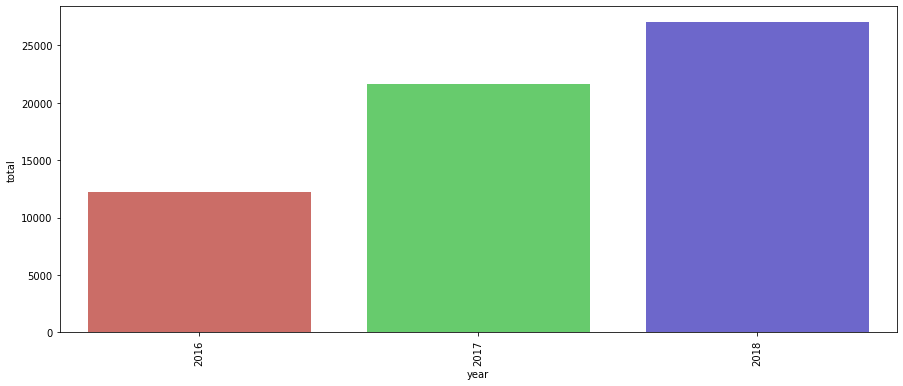

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'year', y = 'total', data = crime_data_new,
palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [42]:
crime_data.columns

Index(['S. No', 'Category', 'State/UT', '2016', '2017', '2018',
       'Percentage Share of State/UT (2018)',
       'Mid-Year Projected Population (in Lakhs) (2018)+',
       'Rate of Total Cyber Crimes (2018)++', 'Total'],
      dtype='object')

In [43]:
crime_data.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++,Total
0,1,State,Andhra Pradesh,616,931,1207,4.4,520.3,2.3,2754
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5,12
2,3,State,Assam,696,1120,2022,7.4,340.4,5.9,3838
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3,1116
4,5,State,Chhattisgarh,90,171,139,0.5,284.7,0.5,400


In [65]:
x = crime_data.drop(['S. No', 'Category', 'State/UT','Percentage Share of State/UT (2018)',
'Mid-Year Projected Population (in Lakhs) (2018)+', 'Rate of Total Cyber Crimes (2018)++',
'Total',], axis = 1)
y = crime_data['Total']

In [66]:
x

,2016,2017,2018
0,616,931,1207
1,4,1,7
2,696,1120,2022
3,309,433,374
4,90,171,139
5,31,13,29
6,362,458,702
7,401,504,418
8,31,56,69
9,28,63,73


### Step 5 : Train-Test Split and feature scaling


In [67]:

x.shape


(36, 3)

In [68]:
y.shape

(36,)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Step 6 : Model Building


In [70]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=6)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [71]:
print("Training Accuracy :", regressor.score(X_train, y_train))
print("Testing Accuracy :", regressor.score(X_test, y_test))


Training Accuracy : 0.9999943902890364
Testing Accuracy : 0.8744535145056246


In [72]:
from sklearn.ensemble import RandomForestRegressor


In [73]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

### Step 7 : Accuracy and Evaluation

In [74]:
print("Training Accuracy :", rf_regressor.score(X_train, y_train))
print("Testing Accuracy :", rf_regressor.score(X_test, y_test))

Training Accuracy : 0.8458481304846976
Testing Accuracy : 0.8509776757879081
